In [40]:
# Grouped bar plot example
# remember to add axis labels etc...
# this was done quickly in the tutorial

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
import math

In [5]:
df = pd.read_csv("hk.csv", header=None)

In [7]:
ndf = df.fillna(0)

In [13]:
hks = ndf.to_numpy().flatten()

In [18]:
d_hks= ss.describe(hks)
print(f"{d_hks=}")
d_hks.mean

d_hks=DescribeResult(nobs=280, minmax=(0.0, 4.0), mean=0.7, variance=0.7627240143369173, skewness=1.2348344998841236, kurtosis=1.153368618915711)


0.7

In [41]:
def f(i): return 1 / math.factorial(i) * d_hks.mean**i * np.exp(-d_hks.mean)

In [47]:
iss = np.array(list(range(10)))

In [49]:
fss = np.array([f(i) for i in iss])
fss

array([4.96585304e-01, 3.47609713e-01, 1.21663399e-01, 2.83881265e-02,
       4.96792214e-03, 6.95509100e-04, 8.11427283e-05, 8.11427283e-06,
       7.09998873e-07, 5.52221346e-08])

In [31]:
bin_edges = np.arange(-0.5, 10.5, 1.0)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
bin_centers

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [22]:
bin_edges

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5])

In [50]:
h, _ = np.histogram(hks, bin_edges, density=True)

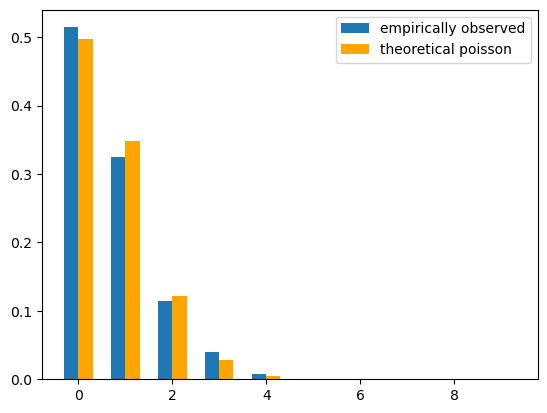

In [53]:
width = 0.3
plt.bar(bin_centers - width/2, h, width=width, label="empirically observed")
ax = plt.gca()
ax.bar(iss + width/2, fss, width=width, color="orange", label="theoretical poisson")
ax.legend()